# ICE

# Proyección de Ventas para el año 2017

En este proyecto el departamento de data analyst estará a cargo del pronóstico de ventas para el período 2017 tomando como base las ventas del 2016, además de identificar cuales pueden ser los patrones que contienen los proyectos que son exitosos para de esta forma brindar datos limpios que permitan tomar decisiones sobre campañas publicitarias y proyectos exitosos.

# Contenido <a id='back'></a>
* 1 Inicio
* 2 Valores Ausentes
* 2.1 Columna Name
* 2.2 Columna Genre
* 2.3 Columna year_of_replace
* 2.4 Columna user_score
* 2.5 Columna critic_score
* 2.6 Columna Rating
* 3 Ampliación de Datos
* 4 Análisis de datos
* 4.1 Análisis de Mercado
* 4.2 Análisis de Ventas
* 5 Perfil de Usuario por Región
* 5.1 Norteamérica
* 5.2 Europa
* 5.3 Japón
* 6 Prueba de Hipótesis 
* 6.1 Hipótesis Nula
* 6.2 Hipótesis Alternativa
* 7 Conclusiones

## Inicio

In [1]:
#Importamos las librerias que nos permitirán llevar a cabo el proyecto
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Llamamos al dataset correspondiente al proyecto solicitado
df=pd.read_csv('/datasets/games.csv') #Lo denominaremos df para mayor practicidad durante el desarrollo

In [3]:
#Tomaremos una muestra aleatoria de 20 columnas para observar el df 
df.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16513,Tennis no Oji-Sama: Doubles no Oji-Sama - Boys...,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9848,Space Chimps,PS2,2008.0,Platform,0.06,0.05,0.00,0.02,NaN,6.6,E10+
5819,Yuu Yuu Hakusho 2: Kakutou no Sho,SNES,1994.0,Fighting,0.00,0.00,0.31,0.00,NaN,NaN,NaN
2388,Kingdom Hearts Re: Chain of Memories,PS2,2008.0,Role-Playing,0.73,0.03,0.00,0.12,68.0,7.2,E10+
2450,Army of Two: The 40th Day,PS3,2010.0,Shooter,0.44,0.27,0.01,0.12,74.0,7,M
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
9674,Sleeping Dogs,PC,2012.0,Action,0.06,0.05,0.00,0.01,81.0,8.2,M
13279,Deadliest Catch: Alaskan Storm,X360,2008.0,Sports,0.04,0.00,0.00,0.00,56.0,5.9,T
3208,Okami,PS2,2006.0,Action,0.11,0.03,0.15,0.34,93.0,9.3,T
14368,Summon Night 6: Lost Borders,PS4,2016.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [4]:
#Extraemos solo las columnas para verificar como estan escritas
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


A simple vista observamos columnas con carácteres en diferentes formatos, valores ausentes en mínimo 3 columnas con gran cantidad de ellos. Nuestro primer paso será llevar los títulos de las columnas a carácteres minúsculos de forma que logremos uniformidad en la forma del datafreame 

In [5]:
#Reemplazaremos los nombres de columnas por el tipo de ortografía sugerida
df=df.rename(
  columns={'Name':'name',
           'Platform':'platform',
           'Year_of_Release':'year_of_release',
           'Genre':'genre',
           'NA_sales':'na_sales',
           'EU_sales':'eu_sales',
           'JP_sales':'jp_sales',
           'Other_sales':'other_sales', 
           'Critic_Score':'critic_score', 
           'User_Score':'user_score',
           'Rating':'rating',
          }
)


In [6]:
#Comprobamos los cambios realizados
(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
#Analizaremos los datos en el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Valores Ausentes

Tenemos valores ausentes en diversas columnas del df dado esto algunas columnas como critic_score, user_score y rating serán reemplazados con el uso de la mediana puesto que nos brinda un resultado más cercano a la realidad posible para no inferir o alterar los resultados del proyecto.

In [8]:
#Cuantificamos los valores ausentes en el df 
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Columna Name

In [9]:
#Eliminamos los valores ausentes de la columna name dado que no son representativos para el df total
df.dropna(subset=['name'], inplace=True)

In [10]:
#Comprobamos que hayan sido reemplazados correctamente 
df['name'].isnull().sum()

0

In [11]:
#Eliminamos los valores ausentes de la columna genre dado que no son representativos para el df total
df.dropna(subset=['genre'], inplace=True)

### Columna Genre

In [12]:
#Comprobamos que hayan sido reemplazados correctamente
df['genre'].isnull().sum()

0

Para reemplazar los valores ausentes en la columna year of release se tomará como referencia la columna platform, en caso de existir valores ausentes luego del reemplazo estos serán eliminados.

### Columna year_of_release

In [13]:
#Reemplazamos los valores ausentes en year_of_release por años de lanzamiento de otra plataforma
df['year_of_release']=df['year_of_release'].replace('NaN', 'platform')

In [14]:
#Comprobamos haber rellenado la totalidad de valores ausentes
df['year_of_release'].isnull().sum()

269

In [15]:
#Eliminamos los valores ausentes que no fueron reemplazados
df.dropna(subset=['year_of_release'], inplace=True)

In [16]:
#Comprobamos valores ausentes eliminados
df['year_of_release'].isna().sum()

0

In [17]:
#Cambiamos el tipo de datos para el año de lanzamiento
df['year_of_release'].astype("int64")

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

### Columna user_score

In [18]:
#Cambiamos el tipo de dato en la columna user_score
df['user_score']=df['user_score'].replace("tbd",np.nan).astype("float64")

Para la columna user_score no se reemplazarán valores ausentes dado que al ser calificaciones de los usuarios, no deberiamos interferir por el contrario trabajaremos en función de los valores ausentes.

### Columna critic_score

Al ser una columna netamente de reseñas decidimos no reemplazar los valores ausentes en ella los cuales son significativos para evitar inferir en las pruebas finales por alterar los datos, por el contrario recomendamos incentivar al usuario a dejar reseñas y puntuaciones que nos permitan para futuros pronósticos trabajar con datos que nos muestren más realidad acerca de lo que piensan los usuarios.

### Columna Rating

In [19]:
#Reemplazamos los valores ausentes en la columna rating
df['rating']=df['rating'].fillna('unknow')

In [20]:
#Comprobamos que no existan valores ausentes
df['rating'].isnull().sum()

0

In [21]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

## Ampliación de Datos

In [22]:
#Creamos una tabla que contenga las ventas totales por region y juego
total_saless=df.pivot_table(index='name', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
total_saless['total_sales']=total_saless.sum(axis=1)
total_saless

,eu_sales,jp_sales,na_sales,other_sales,total_sales
name,,,,,
Beyblade Burst,0.00,0.03,0.00,0.00,0.03
Fire Emblem Fates,0.23,0.52,0.81,0.11,1.67
Frozen: Olaf's Quest,0.53,0.00,0.48,0.09,1.10
Haikyu!! Cross Team Match!,0.00,0.04,0.00,0.00,0.04
Tales of Xillia 2,0.12,0.45,0.20,0.07,0.84
...,...,...,...,...,...
thinkSMART FAMILY!,0.00,0.00,0.03,0.00,0.03
thinkSMART: Chess for Kids,0.00,0.00,0.01,0.00,0.01
uDraw Studio,0.57,0.00,1.65,0.20,2.42


In [23]:
#Añadimos las ventas totales al dataframe original
df1=df.merge(total_saless, on='name', how='outer')
df1.drop(['na_sales_y', 'eu_sales_y', 'jp_sales_y', 'other_sales_y'], axis=1, inplace=True)
df1.rename(columns={'na_sales_x':'na_sales',
                    'eu_sales_x':'eu_sales',
                    'jp_sales_x':'jp_sales',
                    'other_sales_x':'other_sales'
                   }
          )
df1

,name,platform,year_of_release,genre,na_sales_x,eu_sales_x,jp_sales_x,other_sales_x,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,45.31
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,unknow,45.31
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,unknow,0.01
16440,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16441,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknow,0.01
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknow,0.01


In [24]:
#Agregamos la columna total_sales a nuestro df original
df1=df.merge(total_saless, on='name', how='outer', suffixes=('', '_y')
)
df1.drop(['na_sales_y', 'eu_sales_y', 'jp_sales_y', 'other_sales_y'], axis=1, inplace=True)#Eliminamos columnas duplicadas
df1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,45.31
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,unknow,45.31
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,unknow,0.01
16440,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16441,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknow,0.01
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknow,0.01


In [25]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Análisis de Datos

En esta etapa nos dispondremos a segregar los datos más significativos de la empresa con la finalidad de poder pronoticar lo que será el año 2017, como toda proyección debe estar basado en datos pasados, indagaremos cuales han sido nuestras mejores regiones de ventas, plataformas más importantes y tambien definiremos cuales serán los años específicos en los cuales se basarán las proyecciones.

### Análisis de Mercado

In [26]:
#Encontramos la cantidad de juegos lanzados por año
cant=df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release', ascending=False)
cant

,name
year_of_release,
2016.0,502
2015.0,606
2014.0,581
2013.0,544
2012.0,653
2011.0,1136
2010.0,1255
2009.0,1426
2008.0,1427


<AxesSubplot:title={'center':'Juegos Lanzados por año'}, xlabel='year_of_release'>

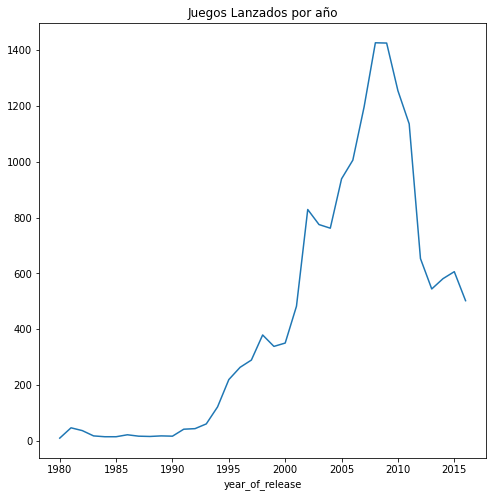

In [27]:
#Generamos línea de tiempo de juegos lanzados al mercado
cant.plot(title='Juegos Lanzados por año', figsize=(8,8), legend=False)

Los años más siginificativos van de 2010 al 2012 luego se percibe una caida hasta el año 2014 dado que en el 2015 aumenta nuevamnte

### Análisis de Ventas

In [28]:
#Distribución total de ventas según cada plataforma
sales_platf=df1.pivot_table(index='platform', values='total_sales').sort_values(by='total_sales', ascending=False)
sales_platf

,total_sales
platform,
GB,3.718247
NES,3.429490
XOne,3.002348
WiiU,2.733061
X360,2.117338
PS4,2.045408
PC,1.961024
PS3,1.933216
GEN,1.721481


In [29]:
#Las principales plataformas de ventas 
print(sales_platf.head(5))

          total_sales
platform             
GB           3.718247
NES          3.429490
XOne         3.002348
WiiU         2.733061
X360         2.117338


In [30]:
#Plataformas con menor desepempeños en ventas
print(sales_platf.tail(5))

          total_sales
platform             
NG           0.215000
TG16         0.080000
GG           0.040000
3DO          0.033333
PCFX         0.030000


<AxesSubplot:title={'center':'Distribución Histórica en Ventas Totales por Plataformas'}, xlabel='platform'>

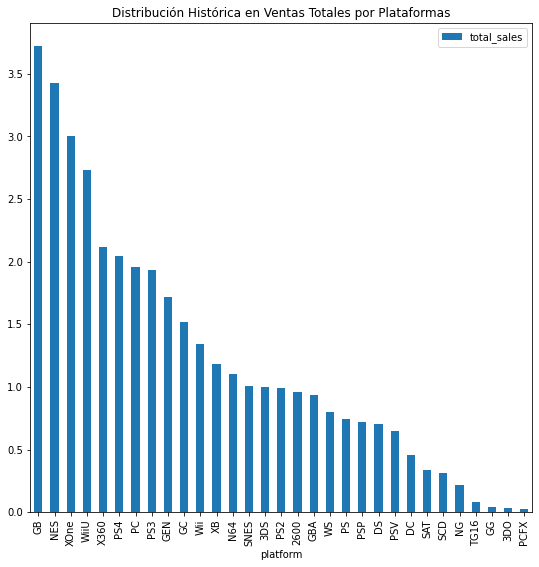

In [31]:
#Gráfica de distribución para el total de ventas por plataformas
sales_platf.plot(kind='bar', figsize=(9,9), title='Distribución Histórica en Ventas Totales por Plataformas')

Podemos notar que existen plataformas que han evolucionado y dejado en el pasado a sus plataformas originales como es el caso de los PS, DS y plataformas que han pérdido su preferencia dentro de los consumidores tales como PCPX, 3DO, TG16 debemos considerar que son plataformas tecnógicas de alta competencia en el rubro y de constantes actualizaciones lo cual da paso a acciones de misma tecnología con mayores actualizaciones o a desplazarlas en el mercado.

Los años que tomaremos en cuenta para el pronóstico serán a partir del año 2013 es decir 2013-2016 para poder llevar a cabo análisis y proyecciones según lo que nos dictan los últimos 3 años de ventas

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

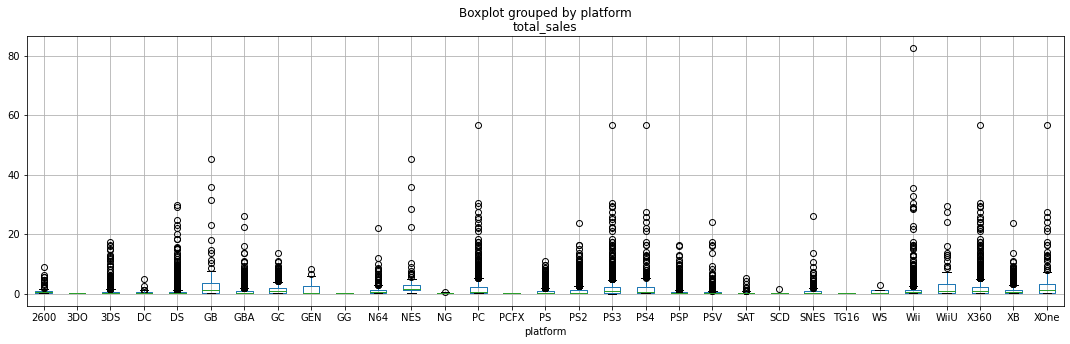

In [32]:
#Diagrama para todos los juegos por plataformas 
df1.boxplot(column='total_sales', by='platform', figsize=(18,5))

In [33]:
#Correlación entre las reseñas de los usuarios y las ventas
correlacion=df1.pivot_table(index='total_sales', values='critic_score', aggfunc='corr')
correlacion

,,critic_score
total_sales,,
0.01,critic_score,1.0
0.02,critic_score,1.0
0.03,critic_score,1.0
0.04,critic_score,1.0
0.05,critic_score,1.0
...,...,...
27.39,critic_score,1.0
29.20,critic_score,1.0
29.40,critic_score,1.0


Podemos corroborar que las reseñas tienen influencia directa sobre las ventas de un juego.

In [34]:
#Generamos distribución de los géneros más vendidos
distribucion=df1.pivot_table(index='genre', values='total_sales').sort_values(by='total_sales', ascending=False)
distribucion

,total_sales
genre,
Shooter,2.193364
Platform,1.661196
Sports,1.658270
Action,1.633480
Racing,1.357162
Fighting,1.055830
Role-Playing,1.024801
Misc,0.952621
Simulation,0.784714


<AxesSubplot:title={'center':'Distribución según Género'}, xlabel='genre'>

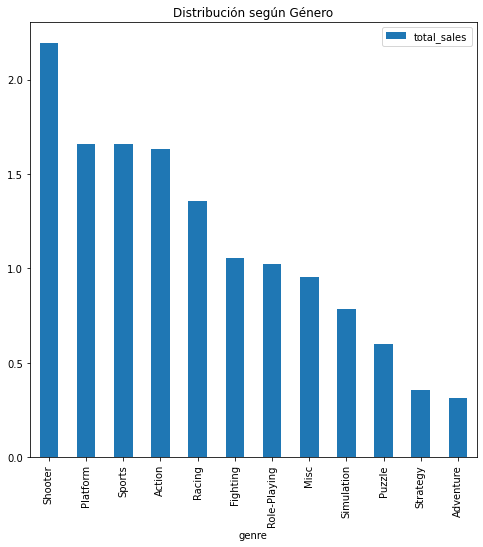

In [35]:
distribucion.plot(kind='bar', figsize=(8,8), title='Distribución según Género')

En líneas generales los juegos más vendidos corresponden a estos cuya trama no es el común del dia a día de los usuarios, mientras que juegos más convencionales tienden a estar rezagados en comparación a juegos de disparos.

## Perfil de Usuario por Región

### Norteamérica

In [36]:
#Creamos una tabla con las principales características de na_sales
perfil_na=df1.pivot_table(index=['platform', 'genre', 'rating'], values='na_sales').sort_values(by='na_sales', ascending=False)
print(perfil_na.head(5))

                           na_sales
platform genre     rating          
NES      Shooter   unknow  4.147143
PS       Sports    T       3.235000
WiiU     Racing    E       3.150000
NES      Adventure unknow  2.190000
GB       Puzzle    unknow  1.956667


para el caso de norteamerica los juegos de disparos son los más vendidos independiente de que no se registran reseñas sobre estos, luego tenemeos juegos deortivos y de aventuras las cuales son diseñadas para distintas plataformas

### Europa

In [37]:
#Creamos una tabla con las principales características de eu_sales
perfil_eu=df1.pivot_table(index=['platform', 'genre', 'rating'], values='eu_sales').sort_values(by='eu_sales', ascending=False)
print(perfil_eu.head(5))

                         eu_sales
platform genre   rating          
WiiU     Racing  E       2.150000
PS4      Shooter unknow  1.716667
PS       Sports  T       1.395000
         Action  T       1.104545
PS4      Racing  T       1.080000


Para el caso de europa conseguimos mismos juegos en distintas plataformas, pasando desapercibidas en algunas plataformas las carencias de reseñas por parte de otros usuarios.

### Japón

In [38]:
#Creamos una tabla con las principales características de jp_sales
perfil_jp=df1.pivot_table(index=['platform', 'genre', 'rating'], values='jp_sales').sort_values(by='jp_sales', ascending=False)
print(perfil_jp.head(5))

                              jp_sales
platform genre        rating          
NES      Misc         unknow  1.790000
GB       Role-Playing unknow  1.645238
NES      Adventure    unknow  1.610000
         Role-Playing unknow  1.464545
PS       Misc         K-A     1.460000


El mercado japones muestra grandes diferencias con respecto a nuestros otros mercados, para Japón dentro de los juegos principales se encuentra el Role, el cual solo figura en estas posiciones para este mercado, por tanto esto nos deja a la plataforma PS como las solicitada para los japoneses. En cuanto a las ventas de Japón no hay una mayor diferencia entre los juegos que contienen reseñas y los cuales no poseen ninguna.

## Prueba de Hipótesis

### Prueba de Igualdad de Medias XboxOne y PC

Como hipótesis nula tenemos:

**—Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

In [39]:
#Desviación Estándar para critic_score
desviacion_critic_score=np.std(df1['critic_score'])
print(f'la desviacion estándar de critic_score corresponde a {desviacion_critic_score}')

la desviacion estándar de critic_score corresponde a 13.919188153932785


In [40]:
#Variación para critic_score
variacion_critic_score=np.var(df1['critic_score'])
print(f'la varianza de critic_score corresponde a {variacion_critic_score}')

la varianza de critic_score corresponde a 193.74379886458274


In [41]:
#Extraemos los datos según platform y critic_score
critic_one=df1[df1['platform']=='XOne']['critic_score'].dropna()

In [42]:
#Extraemos los datos según platform y critic_score
critic_pc=df1[df1['platform']=='PC']['critic_score'].dropna()

In [43]:
#Comprobamos la hipótesis nula
critic_one

critic_pc

alpha = 0.05 #establecemos un nivel crítico de significación estadística

results = st.ttest_ind(critic_one, critic_pc, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.01703439223856624
Rechazamos la hipótesis nula


Los usuarios opinan de forma diferente para XOne y PC, motivo por el cual se rechaza la hipótesis nula.

### Prueba de Igualdad de Medias de Acción y Deporte

Como hipótesis Alternativa tenemos:

**—Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

In [44]:
#Extraemos el género Action
critic_action=df1[df1['genre']=='Action']['critic_score'].dropna()

In [45]:
#Extraemos el género Sports
critic_sport=df1[df1['genre']=='Sports']['critic_score'].dropna()

In [47]:
#Comprobamos la hipótesis Alternativa
critic_action

critic_sport

alpha = 0.05 #establecemos un nivel crítico de significación estadística

results = st.ttest_ind(critic_action, critic_sport, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.0115459518638272e-23
Rechazamos la hipótesis nula


Dado nuestros resultados se rechaza la hipótesis nula y podemos concluir que tanto acción y deportes tienen la misma calificación por los usuarios, dado que son de los generos preferidos en el mercado.

## Conclusiones

Luego de Analizar el comportamiento del mercado en general podemos concluir que la plafatorma mas vendida históricamente ha sido GB, los géneros más vendidos son shooter, platform, action y sports, analizando cada mercado notamos que Norteamérica y Europa poseen similutes en cuanto a sus plaformas preferidas las cuales son Wiiu y PS del mismo modo como prefieren juegos sports y racing mientras que el mercado japones tiene un selecto gusto por el role y juegos difentes a los mercados anteriores comparten el tipo de plataforma donde prefieren jugar, dando una lugar una vez más al Wiiu y PS.
Seria útil para la empresa incluir más juegos en las plataformas GB, NES y XOne ya que son los mas solicitados por los usuarios.

### Recomendaciones 

Seria muy positivo realizar una campaña que incentive a los usuarios a dejar reseñas y puntuaciones sobre los juegos y sus plataformas ya que esto nos permitirá poder realizar analisis más completos y certeros basados en la opinion real de los usuarios, además de poder realizar mejoras en cuanto a funcionamiento del sitio.  